## 0. Load Required Libraries

In [1]:
# !pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import src.util as util
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## 1. Import Configuration File

In [3]:
config_data = util.load_config()

## 2. Load Dataset

In [4]:
def load_dataset(config_data: dict) -> pd.DataFrame:
    # Load every set of data
    x_train = util.pickle_load(config_data["train_set_path"][0])
    y_train = util.pickle_load(config_data["train_set_path"][1])

    x_valid = util.pickle_load(config_data["valid_set_path"][0])
    y_valid = util.pickle_load(config_data["valid_set_path"][1])

    x_test = util.pickle_load(config_data["test_set_path"][0])
    y_test = util.pickle_load(config_data["test_set_path"][1])

    # Concatenate x and y each set
    train_set = pd.concat([x_train, y_train], axis = 1)
    valid_set = pd.concat([x_valid, y_valid], axis = 1)
    test_set = pd.concat([x_test, y_test], axis = 1)

    # Return 3 set of data
    return train_set, valid_set, test_set

In [5]:
train_set, valid_set, test_set = load_dataset(config_data)

## 3. Join Categories

In [6]:
def join_label_categori(set_data, config_data):
    # Check if label not found in set data
    if config_data["label"] in set_data.columns.to_list():
        # Create copy of set data
        set_data = set_data.copy()

        # Rename sedang to tidak sehat
        set_data.categori.replace(config_data["label_categories"][1], config_data["label_categories"][2], inplace = True)

        # Renam tidak sehat to tidak baik
        set_data.categori.replace(config_data["label_categories"][2], config_data["label_categories_new"][1], inplace = True)

        # Return renamed set data
        return set_data
    else:
        raise RuntimeError("Kolom label tidak terdeteksi pada set data yang diberikan!")

### 3.1. Train Set

In [7]:
train_set.categori.value_counts()

SEDANG         914
TIDAK SEHAT    223
BAIK           132
Name: categori, dtype: int64

In [8]:
train_set = join_label_categori(train_set, config_data)

In [9]:
train_set.categori.value_counts()

TIDAK BAIK    1137
BAIK           132
Name: categori, dtype: int64

### 3.2. Valid Set

In [10]:
valid_set.categori.value_counts()

SEDANG         196
TIDAK SEHAT     48
BAIK            28
Name: categori, dtype: int64

In [11]:
valid_set = join_label_categori(valid_set, config_data)

In [12]:
valid_set.categori.value_counts()

TIDAK BAIK    244
BAIK           28
Name: categori, dtype: int64

### 3.3. Test Set

In [13]:
test_set.categori.value_counts()

SEDANG         195
TIDAK SEHAT     48
BAIK            29
Name: categori, dtype: int64

In [14]:
test_set = join_label_categori(test_set, config_data)

In [15]:
test_set.categori.value_counts()

TIDAK BAIK    243
BAIK           29
Name: categori, dtype: int64

## 4. Handling Missing Value

In [16]:
def nan_detector(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Replace -1 with NaN
    set_data.replace(-1, np.nan, inplace = True)

    # Return replaced set data
    return set_data

### 4.1. Convert -1 to NaN

#### 4.1.1. Train Set

In [17]:
train_set.describe()

,pm10,pm25,so2,co,o3,no2
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,51.152088,75.731284,33.360126,11.536643,30.835303,19.267928
std,17.246488,29.306460,14.710573,5.045186,15.319329,9.231295
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,42.000000,60.000000,25.000000,8.000000,21.000000,13.000000
50%,54.000000,77.000000,34.000000,11.000000,28.000000,18.000000
75%,62.000000,93.000000,43.000000,14.000000,37.000000,25.000000
max,100.000000,174.000000,82.000000,44.000000,151.000000,65.000000


In [18]:
train_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [19]:
train_set = nan_detector(train_set)

In [20]:
train_set.isnull().sum()

stasiun      0
pm10        35
pm25        55
so2         68
co          10
o3          35
no2          9
categori     0
dtype: int64

#### 4.1.2. Valid Set

In [21]:
valid_set.describe()

,pm10,pm25,so2,co,o3,no2
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,51.496324,75.459559,34.341912,11.290441,32.533088,18.786765
std,17.315394,28.640510,15.026324,5.297794,14.238053,9.295802
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,43.000000,60.000000,26.000000,8.000000,23.000000,12.000000
50%,54.000000,77.000000,34.000000,10.500000,30.000000,17.000000
75%,62.000000,95.000000,45.000000,13.000000,41.000000,24.250000
max,94.000000,150.000000,80.000000,47.000000,85.000000,62.000000


In [22]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [23]:
valid_set = nan_detector(valid_set)

In [24]:
valid_set.isnull().sum()

stasiun      0
pm10         9
pm25        13
so2         15
co           3
o3           3
no2          4
categori     0
dtype: int64

#### 4.1.3. Test Set

In [25]:
test_set.describe()

,pm10,pm25,so2,co,o3,no2
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,51.121324,73.444853,32.360294,11.816176,31.194853,18.669118
std,18.589466,29.945903,14.567148,5.170456,16.550122,8.879725
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,40.000000,59.000000,23.000000,9.000000,21.000000,13.000000
50%,54.000000,76.000000,32.000000,11.000000,28.000000,18.000000
75%,61.000000,91.000000,43.000000,14.000000,38.250000,24.000000
max,179.000000,150.000000,64.000000,44.000000,93.000000,49.000000


In [26]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [27]:
test_set = nan_detector(test_set)

In [28]:
test_set.isnull().sum()

stasiun      0
pm10         9
pm25        18
so2         14
co           3
o3          10
no2          6
categori     0
dtype: int64

### 4.2. Handling in PM10

#### 4.2.1. Train Set

In [29]:
# Extract mean value from pm10 by target label
impute_1 = int(train_set[train_set.categori == "BAIK"].pm10.mean())
impute_0 = int(train_set[train_set.categori == "TIDAK BAIK"].pm10.mean())

In [30]:
# Check the value
impute_1, impute_0

(28, 55)

In [31]:
# Check number of null value
train_set[train_set.categori == "BAIK"].pm10.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(5, 30)

In [32]:
# Replace NaN
train_set.loc[train_set[(train_set.categori == "BAIK") & (train_set.pm10.isnull() == True)].index, "pm10"] = impute_1
train_set.loc[train_set[(train_set.categori == "TIDAK BAIK") & (train_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [33]:
# Check number of null value after imputation
train_set[train_set.categori == "BAIK"].pm10.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

#### 4.2.2. Valid Set

In [34]:
valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(2, 7)

In [35]:
valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK BAIK") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [36]:
valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

#### 4.2.3. Test Set

In [37]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(3, 6)

In [38]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK BAIK") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [39]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

### 5.3. Handling in PM25

#### 5.3.1. Train Set

In [40]:
impute_1 = int(train_set[train_set.categori == "BAIK"].pm25.mean())
impute_0 = int(train_set[train_set.categori == "TIDAK BAIK"].pm25.mean())

In [41]:
impute_1, impute_0

(38, 82)

In [42]:
train_set[train_set.categori == "BAIK"].pm25.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(35, 20)

In [43]:
train_set.loc[train_set[(train_set.categori == "BAIK") & (train_set.pm25.isnull() == True)].index, "pm25"] = impute_1
train_set.loc[train_set[(train_set.categori == "TIDAK BAIK") & (train_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [44]:
train_set[train_set.categori == "BAIK"].pm10.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

#### 5.3.2. Valid Set

In [45]:
valid_set[valid_set.categori == "BAIK"].pm25.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(5, 8)

In [46]:
valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK BAIK") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [47]:
valid_set[valid_set.categori == "BAIK"].pm25.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(0, 0)

#### 5.3.3. Test Set

In [48]:
test_set[test_set.categori == "BAIK"].pm25.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(10, 8)

In [49]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK BAIK") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [50]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

### 5.4. Handling in SO2, CO, O3, dan NO2

#### 5.4.1. Train Set

In [51]:
impute_so2 = int(train_set.so2.mean())
impute_co = int(train_set.co.median())
impute_o3 = int(train_set.o3.median())
impute_no2 = int(train_set.no2.median())


In [52]:
impute_values = {"so2" : impute_so2, "co" : impute_co, "o3" : impute_o3, "no2" : impute_no2}
impute_values

{'so2': 35, 'co': 11, 'o3': 29, 'no2': 18}

In [53]:
train_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         68
co          10
o3          35
no2          9
categori     0
dtype: int64

In [54]:
train_set.fillna(value = impute_values, inplace = True)

In [55]:
train_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

#### 5.4.2. Valid Set

In [56]:
valid_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         15
co           3
o3           3
no2          4
categori     0
dtype: int64

In [57]:
valid_set.fillna(value = impute_values, inplace = True)

In [58]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

#### 5.4.3. Test Set

In [59]:
test_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         14
co           3
o3          10
no2          6
categori     0
dtype: int64

In [60]:
test_set.fillna(value = impute_values, inplace = True)

In [61]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

## 5. Encoding Stasiun

### 5.1. Prepare Replacement for Columns Name

In [62]:
# # Create mapping dict for replacement
# replacement_stasiun = dict(zip(list(config_data["range_stasiun"]), list(config_data["range_stasiun_str"])))

In [63]:
# # Replacing data
# train_set.stasiun = train_set.stasiun.map(replacement_stasiun)
# valid_set.stasiun = valid_set.stasiun.map(replacement_stasiun)
# test_set.stasiun = test_set.stasiun.map(replacement_stasiun)

### 5.1. Fit OHE to Stasiun Data

In [64]:
def ohe_fit(data_tobe_fitted: dict, ohe_path: str) -> OneHotEncoder:
    # Create ohe object
    ohe_statiun = OneHotEncoder(sparse = False)

    # Fit ohe
    ohe_statiun.fit(np.array(data_tobe_fitted).reshape(-1, 1))

    # Save ohe object
    util.pickle_dump(ohe_statiun, ohe_path)

    # Return trained ohe
    return ohe_statiun

In [65]:
def ohe_transform(set_data: pd.DataFrame, tranformed_column: str, ohe_path: str) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Load ohe stasiun
    ohe_statiun = util.pickle_load(ohe_path)

    # Transform variable stasiun of set data, resulting array
    stasiun_features = ohe_statiun.transform(np.array(set_data[tranformed_column].to_list()).reshape(-1, 1))

    # Convert to dataframe
    stasiun_features = pd.DataFrame(stasiun_features.tolist(), columns = list(ohe_statiun.categories_[0]))

    # Set index by original set data index
    stasiun_features.set_index(set_data.index, inplace = True)

    # Concatenate new features with original set data
    set_data = pd.concat([stasiun_features, set_data], axis = 1)

    # Drop stasiun column
    set_data.drop(columns = "stasiun", inplace = True)

    # Convert columns type to string
    new_col = [str(col_name) for col_name in set_data.columns.to_list()]
    set_data.columns = new_col

    # Return new feature engineered set data
    return set_data

In [66]:
ohe_statiun = ohe_fit(config_data["range_stasiun"], config_data["ohe_stasiun_path"])

### 5.2. Train Set

In [67]:
train_set = ohe_transform(train_set, "stasiun", config_data["ohe_stasiun_path"])

### 5.3. Valid Set

In [68]:
valid_set = ohe_transform(valid_set, "stasiun", config_data["ohe_stasiun_path"])

### 5.4. Test Set

In [69]:
test_set = ohe_transform(test_set, "stasiun", config_data["ohe_stasiun_path"])

## 6. Balancing Label

<AxesSubplot: xlabel='categori', ylabel='Count'>

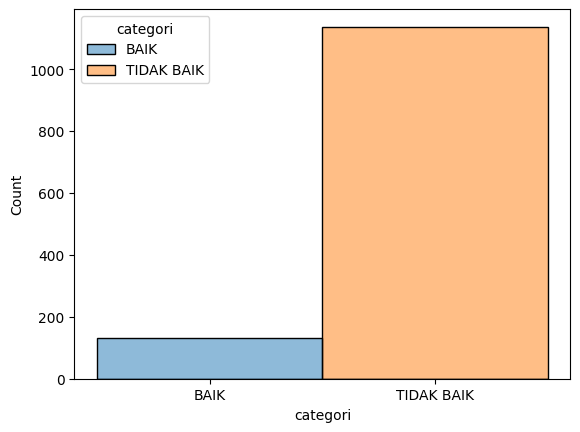

In [70]:
sns.histplot(data = train_set, x = "categori", hue = "categori")

### 6.1. Undersampling

In [71]:
def rus_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 26)

    # Balancing set data
    x_rus, y_rus = rus.fit_resample(set_data.drop("categori", axis = 1), set_data.categori)

    # Concatenate balanced data
    set_data_rus = pd.concat([x_rus, y_rus], axis = 1)

    # Return balanced data
    return set_data_rus

In [72]:
train_set_rus = rus_fit_resample(train_set)

<AxesSubplot: xlabel='categori', ylabel='Count'>

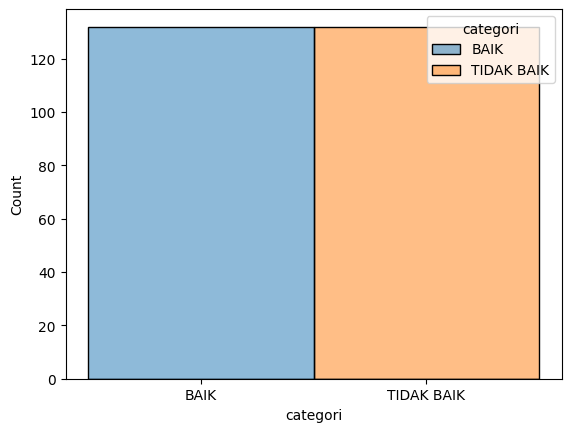

In [73]:
sns.histplot(train_set_rus, x = "categori", hue = "categori")

### 6.2. Oversampling

In [74]:
def ros_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 11)

    # Balancing set data
    x_ros, y_ros = ros.fit_resample(set_data.drop("categori", axis = 1), set_data.categori)

    # Concatenate balanced data
    set_data_ros = pd.concat([x_ros, y_ros], axis = 1)

    # Return balanced data
    return set_data_ros

In [75]:
train_set_ros = ros_fit_resample(train_set)

<AxesSubplot: xlabel='categori', ylabel='Count'>

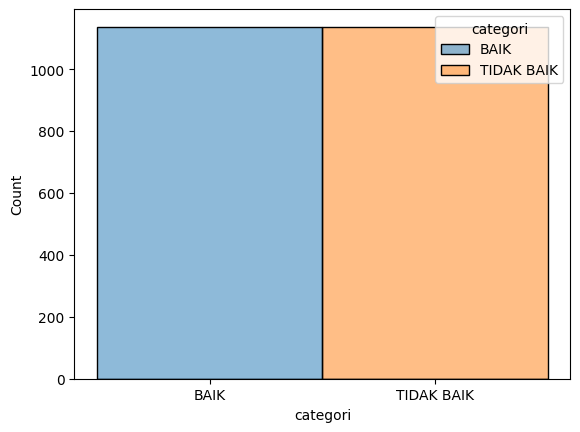

In [76]:
sns.histplot(train_set_ros, x = "categori", hue = "categori")

### 6.3. SMOTE

In [77]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 112)

    # Balancing set data
    x_sm, y_sm = sm.fit_resample(set_data.drop("categori", axis = 1), set_data.categori)

    # Concatenate balanced data
    set_data_sm = pd.concat([x_sm, y_sm], axis = 1)

    # Return balanced data
    return set_data_sm

In [78]:
train_set_sm = sm_fit_resample(train_set)

<AxesSubplot: xlabel='categori', ylabel='Count'>

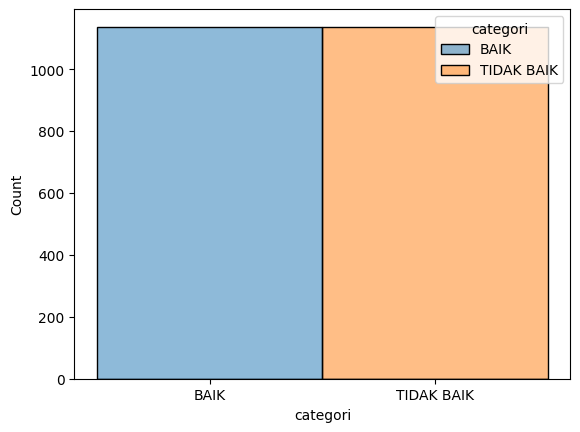

In [79]:
sns.histplot(train_set_sm, x = "categori", hue = "categori")

## 7. Label Encoding

### 7.1. Fit LE to Label Data

In [80]:
def le_fit(data_tobe_fitted: dict, le_path: str) -> LabelEncoder:
    # Create le object
    le_encoder = LabelEncoder()

    # Fit le
    le_encoder.fit(data_tobe_fitted)

    # Save le object
    util.pickle_dump(le_encoder, le_path)

    # Return trained le
    return le_encoder

In [81]:
le_encoder = le_fit(config_data["label_categories_new"], config_data["le_encoder_path"])

In [82]:
def le_transform(label_data: pd.Series, config_data: dict) -> pd.Series:
    # Create copy of label_data
    label_data = label_data.copy()

    # Load le encoder
    le_encoder = util.pickle_load(config_data["le_encoder_path"])

    # If categories both label data and trained le matched
    if len(set(label_data.unique()) - set(le_encoder.classes_) | set(le_encoder.classes_) - set(label_data.unique())) == 0:
        # Transform label data
        label_data = le_encoder.transform(label_data)
    else:
        raise RuntimeError("Check category in label data and label encoder.")
    
    # Return transformed label data
    return label_data


### 7.2. Undersampling set

In [83]:
train_set_rus.categori = le_transform(train_set_rus.categori, config_data)


### 7.3. Oversampling set

In [84]:
train_set_ros.categori = le_transform(train_set_ros.categori, config_data)

#### 7.4. SMOTE

In [85]:
train_set_sm.categori = le_transform(train_set_sm.categori, config_data)

#### 7.4. Validation Set

In [86]:
valid_set.categori = le_transform(valid_set.categori, config_data)

#### 7.5. Test Set

In [87]:
test_set.categori = le_transform(test_set.categori, config_data)

## 8. Dump Dataset

In [88]:
x_train = {
    "Undersampling" : train_set_rus.drop(columns = "categori"),
    "Oversampling" : train_set_ros.drop(columns = "categori"),
    "SMOTE" : train_set_sm.drop(columns = "categori")
}

y_train = {
    "Undersampling" : train_set_rus.categori,
    "Oversampling" : train_set_ros.categori,
    "SMOTE" : train_set_sm.categori
}

In [89]:
util.pickle_dump(x_train, "data/processed/x_train_feng.pkl")
util.pickle_dump(y_train, "data/processed/y_train_feng.pkl")

util.pickle_dump(valid_set.drop(columns = "categori"), "data/processed/x_valid_feng.pkl")
util.pickle_dump(valid_set.categori, "data/processed/y_valid_feng.pkl")

util.pickle_dump(test_set.drop(columns = "categori"), "data/processed/x_test_feng.pkl")
util.pickle_dump(test_set.categori, "data/processed/y_test_feng.pkl")